# Python数据科学分享——3.数据可视化(2)

> 有简洁高效的seaborn，声明式的altair，还有一键生成的voila，以及不用写react的dash

- toc: true 
- badges: true
- comments: true
- categories: [jupyter,Python,Data Science]



In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from matplotlib.font_manager import _rebuild

_rebuild()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {"font.sans-serif": ["SimHei", "Arial"]})

import pandas_alive
import pandas as pd
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

In [16]:
df_covid = pd.read_json("3.data-viz/timeseries.json")
df_covid.index = pd.DatetimeIndex(df_covid.iloc[:, 0].apply(lambda _: _["date"]))
df_covid.index.name = "日期"
df_covid = df_covid.applymap(lambda _: int(_["confirmed"]))
df_covid.replace(0, np.nan, inplace=True)
top20 = df_covid.iloc[-1].sort_values().tail(20).index
df_covid = df_covid[top20]

# [seaborn](https://seaborn.pydata.org/)统计图

面朝大海，春暖花开——海子（原名查海生，1964-1989，安徽安庆市怀宁县人）

2012年，美国斯坦福大学（Stanford）Michael Waskom（目前就职纽约大学NYU）用高级接口在Matplotlib基础上为数据探索和模型拟合创建各种统计图
 

## 频次直方图、KDE图

In [14]:
data = np.random.multivariate_normal(mean=[0, 0], cov=[[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=["x", "y"])

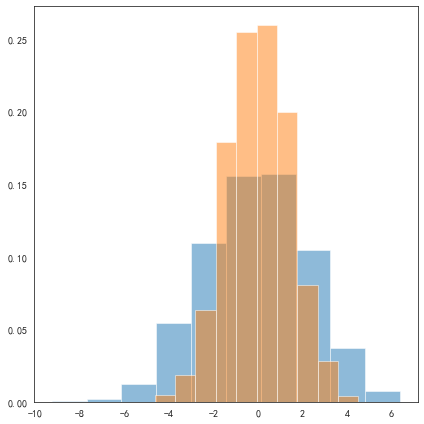

In [255]:
plt.figure(figsize=(6, 6))
for col in "xy":
    plt.hist(data[col], density=True, alpha=0.5)

除了频次直方图，我们还可以用KDE获取变量的平滑分布估计图。Seaborn通过`sns.kdeplot`实现：

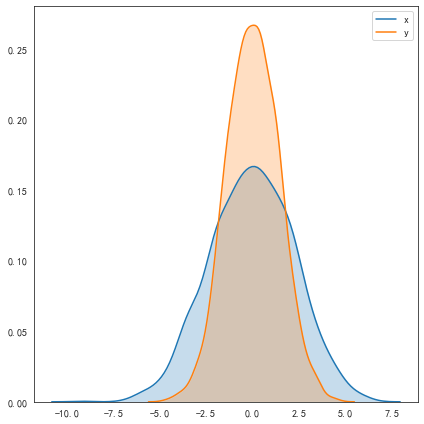

In [273]:
plt.figure(figsize=(6, 6))
for col in "xy":
    sns.kdeplot(data[col], shade=True)

用`sns.distplot`可以让频次直方图与KDE叠加：

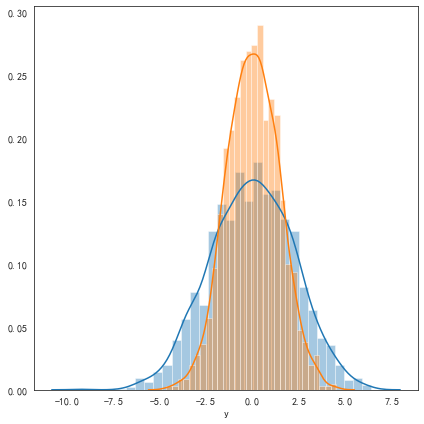

In [261]:
plt.figure(figsize=(6, 6))
for col in "xy":
    sns.distplot(data[col])

如果向`kdeplot`输入的是二维数据集，那么就可以获得一个二维数据可视化图：

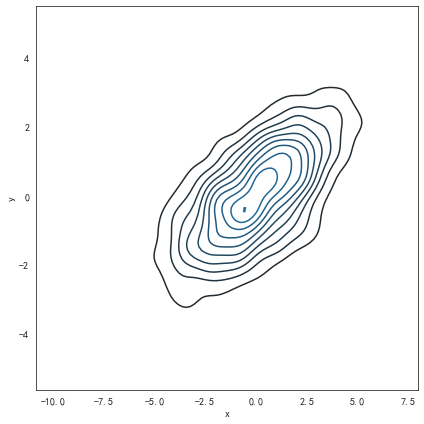

In [268]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data.x, data.y);

用`sns.jointplot`可以同时看到两个变量的联合分布与单变量分布：    

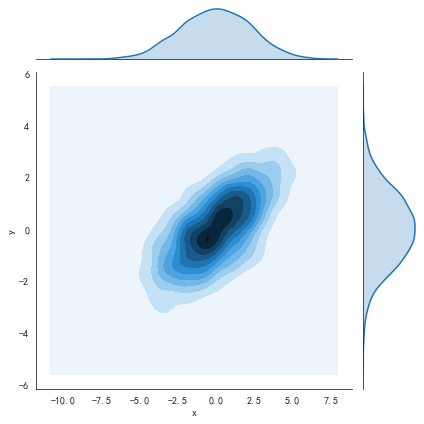

In [270]:
with sns.axes_style("white"):
    sns.jointplot("x", "y", data, kind="kde")

可以向`jointplot`函数传递一些参数。例如，可以用六边形块代替频次直方图：

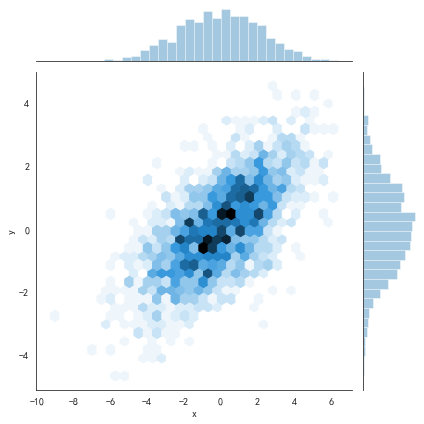

In [271]:
with sns.axes_style("white"):
    sns.jointplot("x", "y", data, kind="hex")

## 矩阵图（pair plot）

用`sns.pairplot`探索多维数据不同维度间的相关性，例如费舍尔鸢尾花数据集记录了3种鸢尾花的花瓣与花萼数据：

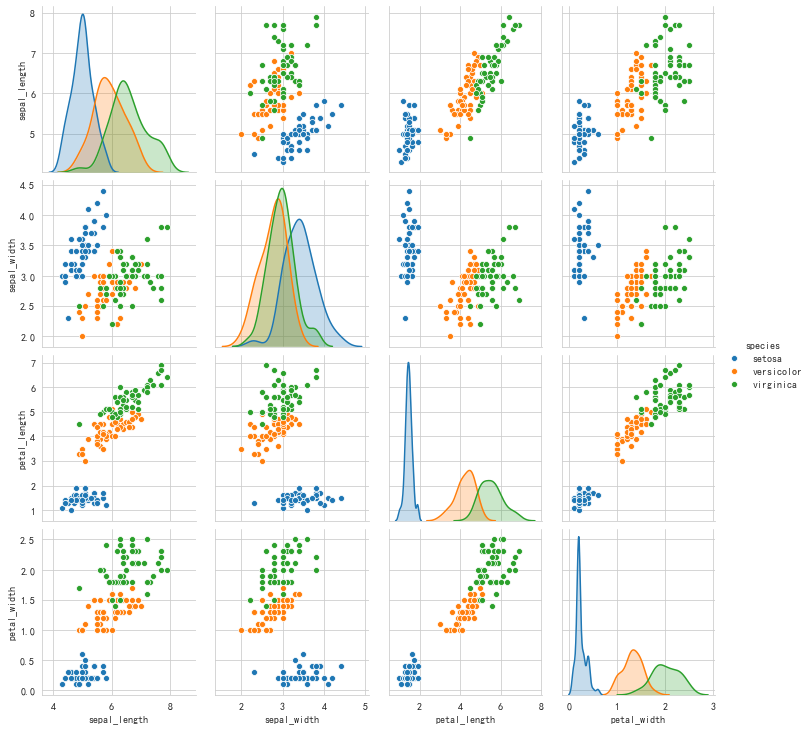

In [45]:
sns.pairplot(iris, hue="species");

## 分面频次直方图

`sns.FacetGrid`获取数据子集的频次直方图。例如，饭店服务员收小费的数据集：
 

In [46]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]
tips.head()

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

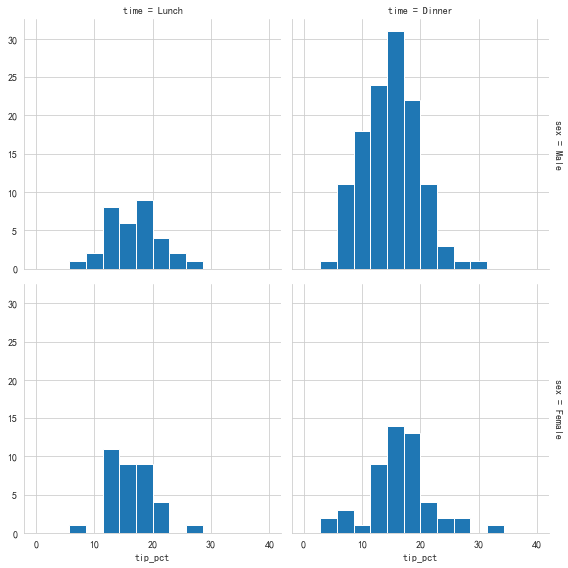

In [47]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True, height=4)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

## 分类图（Categorical plot）


展示分类数据分布情况：

1. Categorical scatterplots:

    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)

1. Categorical distribution plots:

    - :func:`boxplot` (with ``kind="box"``)
    - :func:`violinplot` (with ``kind="violin"``)
    - :func:`boxenplot` (with ``kind="boxen"``)

1. Categorical estimate plots:

    - :func:`pointplot` (with ``kind="point"``)
    - :func:`barplot` (with ``kind="bar"``)
    - :func:`countplot` (with ``kind="count"``)

In [48]:
def show_factor(kind="strip"):
    g = sns.catplot("day", "total_bill", "sex", kind=kind, data=tips, height=7)
    g.set_axis_labels("日期", "小费金额")
    g._legend.set_bbox_to_anchor((1.1, 0.5))

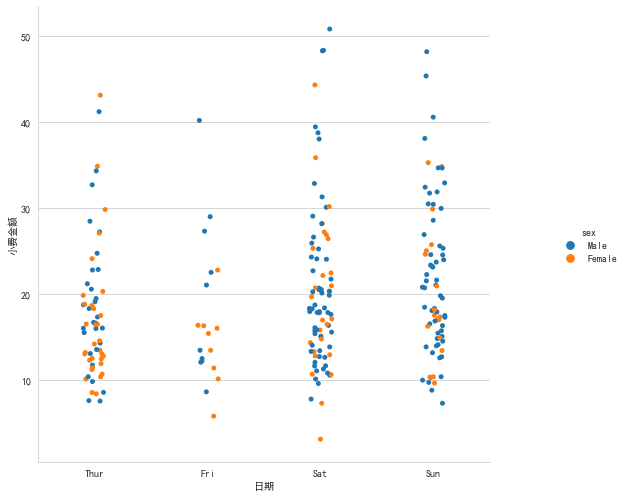

In [49]:
show_factor()

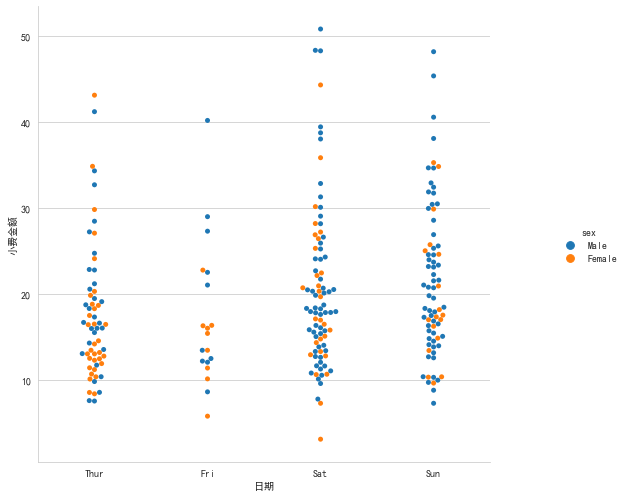

In [50]:
show_factor(kind="swarm")

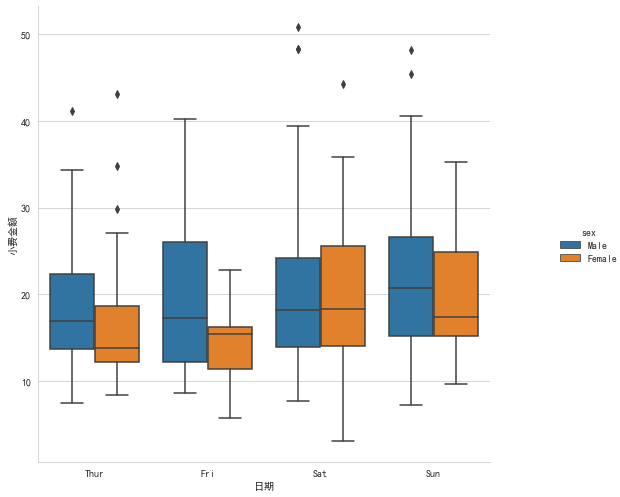

In [51]:
show_factor(kind="box")

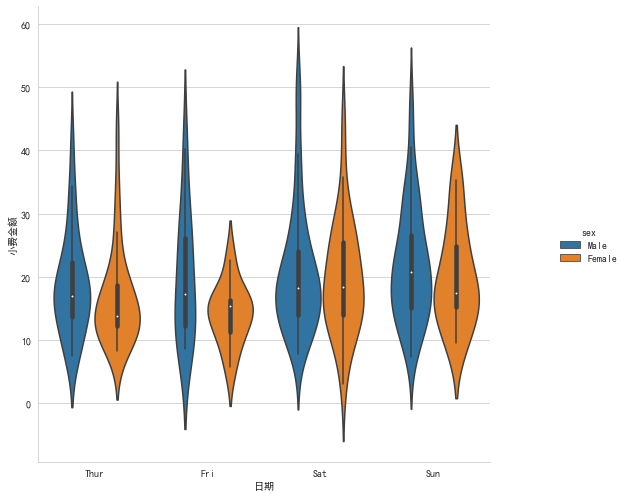

In [52]:
show_factor(kind="violin")

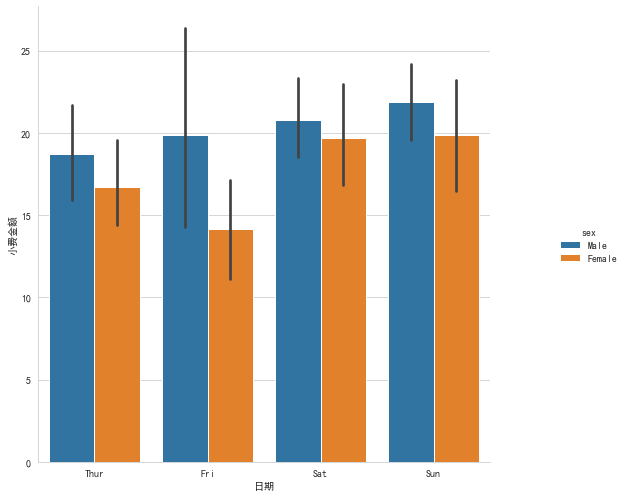

In [53]:
show_factor(kind="bar")

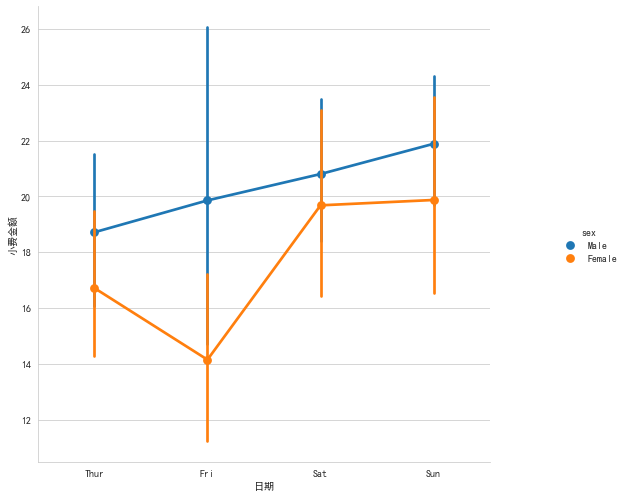

In [54]:
show_factor(kind="point")

## 联合分布图

`sns.jointplot`画出不同数据集的联合分布和各数据本身的分布：

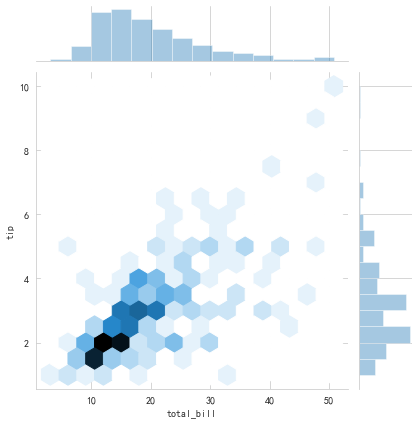

In [55]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex");

联合分布图也可以自动进行KDE和线性拟合：

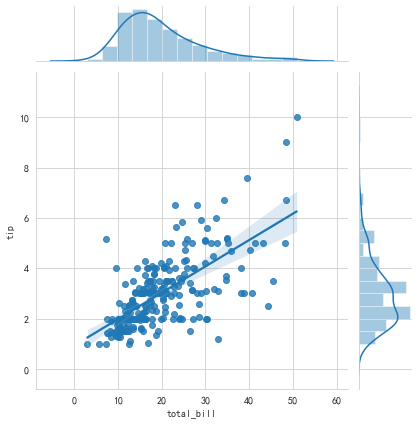

In [56]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg");

## [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling)

Pandas + Matplotlib + Seabron实现的极速EDA工具，[中文显示设置方法](https://blog.csdn.net/wangyaninglm/article/details/101025067)

<img src="3.data-viz/pandas-profiling.png" width=500px></img>

1. 类型推断（Type inference）：检测Dataframe字段类型
1. 基础统计（Essentials）：数据类型、惟一值、缺失值
1. 分位数统计（Quantile statistics）：最小值，Q1，中位数，Q3，最大值，四分位距（interquartile range, IQR）
1. 描述性统计（Descriptive statistics）：均值、众数、标准差、和、MAD（Median absolute deviation, 中位数绝对偏差）、CV(coefficient of variation，变异系数)、峰度、偏度
1. 高频次样本（Most frequent values）
1. 频次直方图（Histogram）
1. 相关矩阵（Correlation Matrix）：三大相关系数——皮尔逊（Pearson）、斯皮尔曼（Spearman）和肯德尔（Kendall），ϕ相关系数（Phi coefficient, Matthews coefficient=MCC）
1. 缺失值处理（Missing values）：矩阵、计数、热力图（heatmap）和树状图（dendrogram）
1. 文本分析（Text analysis）：文本数据的类别(大小写、空格)、字体(拉丁、西里尔)和字符(ASCII)
1. 文件和图像分析（File and Image analysis）：提取文件大小、创建日期和尺寸，并扫描截断的图像或包含EXIF信息的图像

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(iris, title="EDA报告", explorative=True)

In [9]:
profile.to_file("iris_profile.html")

In [60]:
!open iris_profile.html

In [10]:
profile.to_widgets()

字段较多时，相关性分析会比较慢，可以通过`minimal=True`设置参数

In [11]:
profile = ProfileReport(iris, minimal=True)

# 声明式图形库


Matplotlib的缺点：

1. 样式不够丰富
3. web/交互比较差
4. 大数据渲染速度慢
1. API是**命令式（Imperative）**，语法比较啰嗦
5. 数据可视化最大的挑战之一是图形的可移植性（portability）和可重复性（reproducibility ），创建一个图形并导出到PNG或PDF后，数据就很难再提取出来被再次利用。

## [altair](https://altair-viz.github.io/)

2015年，美国华盛顿大学天文学家、UW eScience Institute主任Jake Vanderplas（@jakevpd，目前在谷歌开发基于Numpy的自动微分器[jax](https://github.com/google/jax)）在可视化语义（visualization grammar）库[Vega](https://github.com/vega)基础上开发了altair，一种Python的声明式统计可视化库（Declarative statistical visualization library），将图形打包成描述数据和可视编码之间的关系的**声明式（Declarative）**JSON文件，从而实现将图形与JSON互转，增量更新无需重新绘制

![](3.data-viz/altair-logo-light.png)

| 命令式（Imperative）| 声明式（Declarative）|
|:-:|:-:|
|关注怎样做(How)的过程|关注做什么(What)的结果|
|必须手工配置绘图步骤|自动完成绘图细节|
|配置与执行是耦合的|配置与执行分离的|


> “声明式可视化让你专注数据与联结，毋需深陷技术细节
>
> （Declarative visualization lets you think about data and relationships, rather than incidental details.）”
>
> ——Jake Vanderplas 2017

In [63]:
import altair as alt
from vega_datasets import data

In [64]:
column = iris.columns.to_list()

alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type="quantitative"),
    alt.Y(alt.repeat("row"), type="quantitative"),
    color="species:N",
    tooltip=column,
).properties(width=200, height=200).repeat(
    row=column[:-1], column=column[:-1],
).interactive()

alt.RepeatChart(...)

In [ ]:
source = data.movies.url

heatmap = (
    alt.Chart(source)
    .mark_rect()
    .encode(
        alt.X("IMDB_Rating:Q", bin=True),
        alt.Y("Rotten_Tomatoes_Rating:Q", bin=True),
        alt.Color("count()", scale=alt.Scale(scheme="greenblue")),
    )
)

points = (
    alt.Chart(source)
    .mark_circle(color="black", size=5,)
    .encode(x="IMDB_Rating:Q", y="Rotten_Tomatoes_Rating:Q",)
)

In [65]:
# 支持&（垂直）、|（水平）、+（有序叠加）三种Infix notation（中缀表示法）实现图层排列
heatmap & points

alt.VConcatChart(...)

In [32]:
heatmap | points

alt.HConcatChart(...)

In [33]:
heatmap + points

alt.LayerChart(...)

## [pyecharts](https://github.com/pyecharts/pyecharts)

[ECharts](https://echarts.apache.org/zh/index.html)声明式Javascript可视化库，由百度前端2013年发布1.0版本，2018年进入Apache孵化器。pyecharts是Python对ECharts的简易封装，相比js语法并没有太多优化

> 参考论文：[ECharts: A declarative framework for rapid construction of web-based visualization](https://www.sciencedirect.com/science/article/pii/S2468502X18300068)

In [7]:
from pyecharts import charts, options

bar = (
    charts.Bar()
    .add_xaxis(["衬衫", "毛衣", "领带", "裤子", "风衣", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [114, 55, 27, 101, 125, 27, 105])
    .add_yaxis("商家B", [57, 134, 137, 129, 145, 60, 49])
    .set_global_opts(title_opts=options.TitleOpts(title="某商场销售情况"))
)

In [15]:
bar.render_notebook()

In [18]:
bar.render()

'/Users/toddtao/Documents/reader/data_science/data_science2020/3.数据可视化/render.html'

In [12]:
from IPython.display import IFrame

IFrame(src='3.data-viz/render.html', width=700, height=600)

In [1]:
# print(bar.render_embed())

# webapp

将可视化图转换为webapp发布，解决方案有[dash](https://github.com/plotly/dash)、[volia](https://github.com/voila-dashboards/voila)、[streamlit](https://github.com/streamlit/streamlit)、[Panel](https://github.com/holoviz/panel)、[Bokeh](https://github.com/bokeh/bokeh)

## [plotly](https://github.com/plotly)交互生态系统

加拿大plotly公司开发的可视化工具，有企业版授权，dash解决方案，支持Python、R、JS、Julia、Scala。plotly + pandas = [cufflinks](https://github.com/santosjorge/cufflinks)

In [2]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=np.random.rand(20)))
fig.add_trace(go.Bar(y=np.random.rand(20)))
fig.update_layout(title="plotly图形示例")
fig.show()

## ipywidgets交互控件

In [13]:
from IPython.display import HTML
from ipywidgets import interact, interact_manual
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale="plotly", world_readable=True)

In [17]:
@interact
def show_articles_more_than(字段=df_covid.columns, 阈值=[50_000, 100_000, 200_000]):
    display(HTML(f"<h2>过滤部件：显示{字段} 超过 {阈值} 的行数<h2>"))
    display(df_covid.loc[df_covid[字段] > 阈值, df_covid.columns])

interactive(children=(Dropdown(description='字段', options=('Netherlands', 'Pakistan', 'Belgium', 'Chile', 'Mexi…

In [18]:
@interact
def correlations(
    x=list(df_covid.select_dtypes("number").columns),
    y=list(df_covid.select_dtypes("number").columns[1:]),
):
    print(f"皮尔逊相关系数: {df_covid[x].corr(df_covid[y])}")
    print(f"描述性统计:\n{df_covid[[x, y]].describe()}")
    df_covid.iplot(
        kind="scatter",
        x=x,
        y=y,
        mode="markers",
        xTitle=x.title(),
        yTitle=y.title(),
        title=f"{y.title()} vs {x.title()}",
    )

interactive(children=(Dropdown(description='x', options=('Netherlands', 'Pakistan', 'Belgium', 'Chile', 'Mexic…

## [Voilà](https://github.com/voila-dashboards/voila)基于jupyter构建webapp

将notebook直接转换成web页面，可以通过命令行`volia 3.数据可视化.ipynb --port 8880`运行notebook，也可以通过notebook插件运行

> [papermill]()可以将直接运行notebook文件，支持自定义参数

## [dash](https://github.com/plotly/dash)基于flask、reactjs构建webapp

由于dash运行方式与flask相同，因此不能直接在notebook上渲染，可以通过plotly开发的[jupyter-dash](https://github.com/plotly/jupyter-dash)在notebook上渲染

In [19]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

In [20]:
df = pd.read_csv("3.data-viz/gapminderDataFiveYear.csv")

df.shape

(1704, 6)

In [21]:
df.head()

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

In [22]:
# app = dash.Dash(__name__)
app = JupyterDash(__name__)
app.layout = html.Div(
    [
        dcc.Graph(id="graph-with-slider"),
        dcc.Slider(
            id="year-slider",
            min=df["year"].min(),
            max=df["year"].max(),
            value=df["year"].min(),
            marks={str(year): str(year) for year in df["year"].unique()},
            step=None,
        ),
    ]
)

In [23]:
@app.callback(Output("graph-with-slider", "figure"), [Input("year-slider", "value")])
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]
    traces = []
    for i in filtered_df.continent.unique():
        df_by_continent = filtered_df[filtered_df["continent"] == i]
        traces.append(
            dict(
                x=df_by_continent["gdpPercap"],
                y=df_by_continent["lifeExp"],
                text=df_by_continent["country"],
                mode="markers",
                opacity=0.7,
                marker={"size": 15, "line": {"width": 0.5, "color": "white"}},
                name=i,
            )
        )

    return {
        "data": traces,
        "layout": dict(
            xaxis={"type": "log", "title": "国家(地区)GDP", "range": [2.3, 4.8]},
            yaxis={"title": "人均预期寿命", "range": [20, 90]},
            margin={"l": 40, "b": 40, "t": 10, "r": 10},
            legend={"x": 0, "y": 1},
            hovermode="closest",
            transition={"duration": 500},
        ),
    }


# if __name__ == "__main__":
#     app.run_server(host="0.0.0.0", debug=True)

In [24]:
app.run_server(host="0.0.0.0")

Dash app running on http://0.0.0.0:8050/


In [3]:
app.run_server(host="0.0.0.0", mode="inline", height=500)

In [26]:
df = pd.read_csv("3.data-viz/country.csv")
available_indicators = df["Indicator Name"].unique()
df.head()

Country Name                                     Indicator Name  Year  \
0   Arab World                Agriculture, value added (% of GDP)  1962   
1   Arab World             CO2 emissions (metric tons per capita)  1962   
2   Arab World  Domestic credit provided by financial sector (...  1962   
3   Arab World        Electric power consumption (kWh per capita)  1962   
4   Arab World       Energy use (kg of oil equivalent per capita)  1962   

       Value  
0        NaN  
1   0.760996  
2  18.168690  
3        NaN  
4        NaN

In [27]:
app = JupyterDash(__name__)
# server = app.server
app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),
        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])

In [28]:
@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    return {
        'data': [dict(
            x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 25,
                'opacity': 0.7,
                'color': 'orange',
                'line': {'width': 2, 'color': 'purple'}
            }
        )],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }

In [29]:
def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['Year'],
            y=dff['Value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }

In [30]:
@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)

In [31]:
@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [32]:
app.run_server(host="0.0.0.0")

Dash app running on http://0.0.0.0:8050/


In [2]:
app.run_server(host="0.0.0.0", mode="inline", width=1400, height=700)

# 网络图

1. Networkx:复杂网络绘制与图算法工具
2. daft:matplotlib基础上构建的概率图模型

## [Networkx](https://github.com/networkx/networkx)网络图

复杂网络绘制与图算法工具，可以与[graphviz](https://www.graphviz.org/)结合使用，类似工具推荐[Gephi](https://gephi.org/)

In [2]:
import networkx as nx

G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D", weight=4)

pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
nx.draw(G, pos, with_labels=True, node_size=1000)

In [4]:
nx.shortest_path(G, "A", "D", weight="weight")

['A', 'B', 'D']

In [5]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

G = nx.balanced_tree(2, 5)

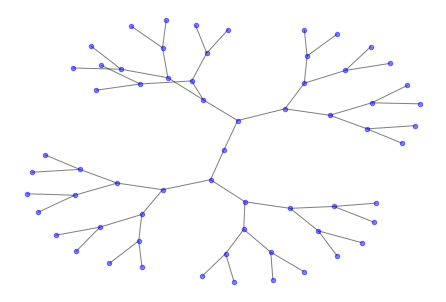

In [6]:
pos = graphviz_layout(G)
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)

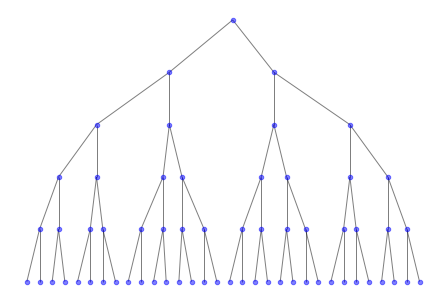

In [7]:
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)

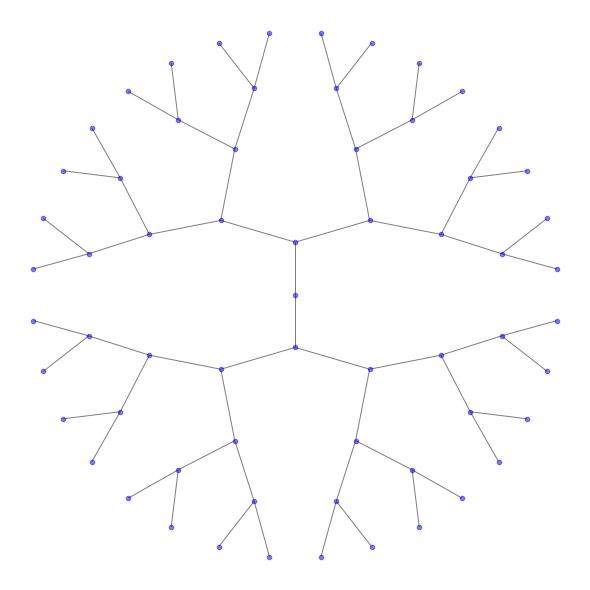

In [8]:
plt.figure(figsize=(8, 8))
pos = graphviz_layout(G, prog="twopi")
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

scikit-learn与graphviz结合，可以让[决策树实现可视化](https://scikit-learn.org/stable/modules/tree.html)

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)


gini不纯度（gini impurity）是CART (classification and regression tree) 决策树进行分裂的衡量指标之一，表示按照当前分裂规则随机抽取样本是错误分类的频率。

鸢尾花种类是$J=3$，那么第$i$种花在数据集中的占比（概率、频率）用$p_i$表示，则计算公式为：

$${I} _{G}(p)=\sum _{i=1}^{3}p_{i}\sum _{k\neq i}p_{k}=\sum _{i=1}^{3}p_{i}(1-p_{i})=\sum _{i=1}^{3}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{3}p_{i}-\sum _{i=1}^{3}{p_{i}}^{2}=1-\sum _{i=1}^{3}{p_{i}}^{2}$$

如果gini不纯度为0，则表示每个叶子节点的所有鸢尾花都有一个明确的分类

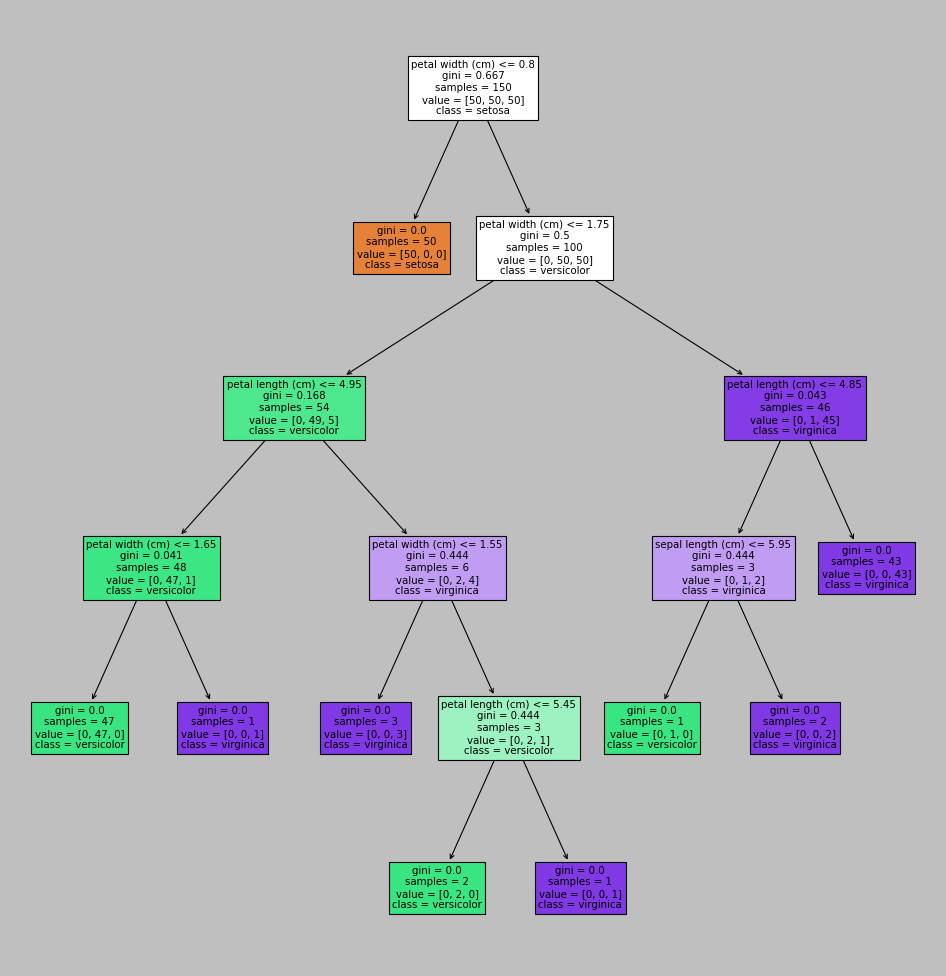

In [4]:
plt.style.use("classic")
plt.figure(figsize=(15, 15))
tree.plot_tree(
    clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True,
)
plt.show()

## [daft](https://docs.daft-pgm.org/en/latest/)贝叶斯网络

Daft是在matplotlib基础上构建的概率图模型（probabilistic graphical models），贝叶斯网络之父朱迪亚·珀尔（Judea Pearl，2011年图灵奖得主）2018年出版了《The book of why（为什么）》介绍贝叶斯网络的因果推断。

In [13]:
!pyreverse -o png -p daft /Users/toddtao/opt/anaconda3/lib/python3.7/site-packages/daft.py

parsing /Users/toddtao/opt/anaconda3/lib/python3.7/site-packages/daft.py...


![](3.data-viz/classes_daft.png)

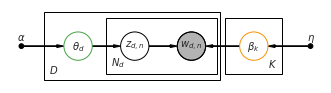

In [27]:
import daft

p_color = {"ec": "#46a546"}
s_color = {"ec": "#f89406"}

pgm = daft.PGM([5.6, 1.4], origin=[0.75, 0.3])

pgm.add_plate([1.4, 0.4, 3.1, 1.2], r"$D$")
pgm.add_plate([2.5, 0.5, 1.95, 1], r"$N_d$")
pgm.add_plate([4.6, 0.5, 1, 1], r"$K$", position="bottom right")

pgm.add_node("alpha", r"$\alpha$", 1, 1, fixed=True)
pgm.add_node("theta", r"$\theta_d$", 2, 1, plot_params=p_color)
pgm.add_node("z", r"$z_{d,n}$", 3, 1)
pgm.add_node("w", r"$w_{d,n}$", 4, 1, observed=True)

pgm.add_node("beta", r"$\beta_{k}$", 5.1, 1, plot_params=s_color)
pgm.add_node("eta", r"$\eta$", 6.1, 1, fixed=True)

pgm.add_edge("alpha", "theta")
pgm.add_edge("theta", "z")
pgm.add_edge("z", "w")

pgm.add_edge("eta", "beta")
pgm.add_edge("beta", "w")

pgm.render()
pgm.savefig("lda.png", dpi=150);

![](3.data-viz/lda.png)